# Imports

In [1]:
import pandas as pd

In [2]:
import json
import pandas as pd

def read_json_to_dataframe(json_path: str) -> pd.DataFrame:
    """
    Reads a JSON file containing experiment results and returns a DataFrame.

    Args:
    - json_path (str): The path to the JSON file.

    Returns:
    - pd.DataFrame: A DataFrame containing the experiment results.
    """
    with open(json_path, 'r') as file:
        data = json.load(file)
    
    # Extract relevant information
    records = []
    for item in data:
        # Assuming each item is a dictionary with an 'id' field and other details
        record = {'id_experiment': item['id']}
        record.update(item)
        records.append(record)
    
    # Create DataFrame
    df = pd.DataFrame(records)
    return df

In [3]:
experiments_folder = r'../experiments'
experiments_file = r'../experiments/experiments.json'
results_folder = r'../experiments/results'

In [4]:
df=read_json_to_dataframe(experiments_file)

In [5]:
df.head()

,id_experiment,id,parameters,loss,reconstruction_loss,kl_loss,position_error,velocity_error,energy_error,average_disorder_metric,...,average_Completeness,average_V-Measure,average_FMI,average_Purity,average_Silhouette Score,average_Jaccard,average_Accuracy,percentage_convergence,percentage_novelty,average_iterations_convergence
0,1,1,"{'model_name': 'vae_conv5', 'data_used': 'EM_N...",15.872869,8.832314,7.040884,15.405916,24.868121,59.968315,1232.32,...,0.511656,0.498002,0.366016,0.538973,0.320613,0.052202,0.438146,0.51,100.0,11.000000
1,2,2,"{'model_name': 'vae_conv5', 'data_used': 'EM_N...",13.935563,4.926813,9.008670,11.552325,20.366081,140.143830,1320.78,...,0.522390,0.526245,0.414035,0.577924,0.290266,0.028250,0.455547,0.49,100.0,10.163265
2,3,3,"{'model_name': 'vae_conv5', 'data_used': 'EM_N...",12.387786,4.153664,8.234063,14.127983,23.214373,135.604779,1462.90,...,0.519810,0.523054,0.411880,0.582065,0.278283,0.061837,0.458224,0.38,100.0,11.131579
3,4,4,"{'model_name': 'vae_conv5', 'data_used': 'EM_N...",8.627936,2.839877,5.788019,10.757704,21.629537,43.499922,139.34,...,0.538380,0.533152,0.402557,0.573301,0.321185,0.032823,0.448431,0.46,100.0,10.108696
4,5,5,"{'model_name': 'vae_conv5', 'data_used': 'EM_N...",9.239604,2.578261,6.661297,9.667578,22.154358,75.618118,71.66,...,0.511341,0.516418,0.400144,0.584824,0.288745,0.063054,0.455238,0.44,100.0,11.204545


In [6]:
import os
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt


In [66]:
import os
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

def create_experiment_image_grid(experiments_folder, image_suffix, crop_length, font_size=12):
    # Set the directory for experiments
    experiments = [d for d in os.listdir(experiments_folder) if os.path.isdir(os.path.join(experiments_folder, d)) and 'experiment_' in d]
    experiments.sort()  # Sorting to maintain numerical order
    
    # Set up the plot
    fig, axes = plt.subplots(3, 2, figsize=(10, 15))  # 3x2 grid
    axes = axes.flatten()
    
    for ax in axes:
        ax.axis('off')  # Hide axes

    # Process each experiment folder
    for i, experiment in enumerate(experiments[:6]):  # Limit to first 6 experiments for the grid
        image_path = os.path.join(experiments_folder, experiment, 'images', f'exp{i+1}_{image_suffix}')
        if os.path.exists(image_path):
            # Load and crop the image
            img = Image.open(image_path)
            img = img.crop((crop_length, crop_length, img.width - crop_length, img.height - crop_length))
            
            # Draw label
            draw = ImageDraw.Draw(img)
            try:
                font = ImageFont.truetype("arial.ttf", font_size)
            except IOError:
                font = ImageFont.load_default()
            text = f"Experiment {i+1}"
            draw.text((10, 10), text, font=font, fill=(255, 255, 255))

            # Show image in grid
            axes[i].imshow(img)
            axes[i].set_title(text)
        else:
            axes[i].text(0.5, 0.5, 'Image not found', horizontalalignment='center', verticalalignment='center')

    # Adjust layout
    plt.tight_layout()
    plt.subplots_adjust(hspace=-0.37)  # Reduce vertical spacing

    # Display the grid
    plt.show()

# Example usage
# create_experiment_image_grid('path_to_main_folder', 'all_generated_data.png', 50, font_size=14)
save_path

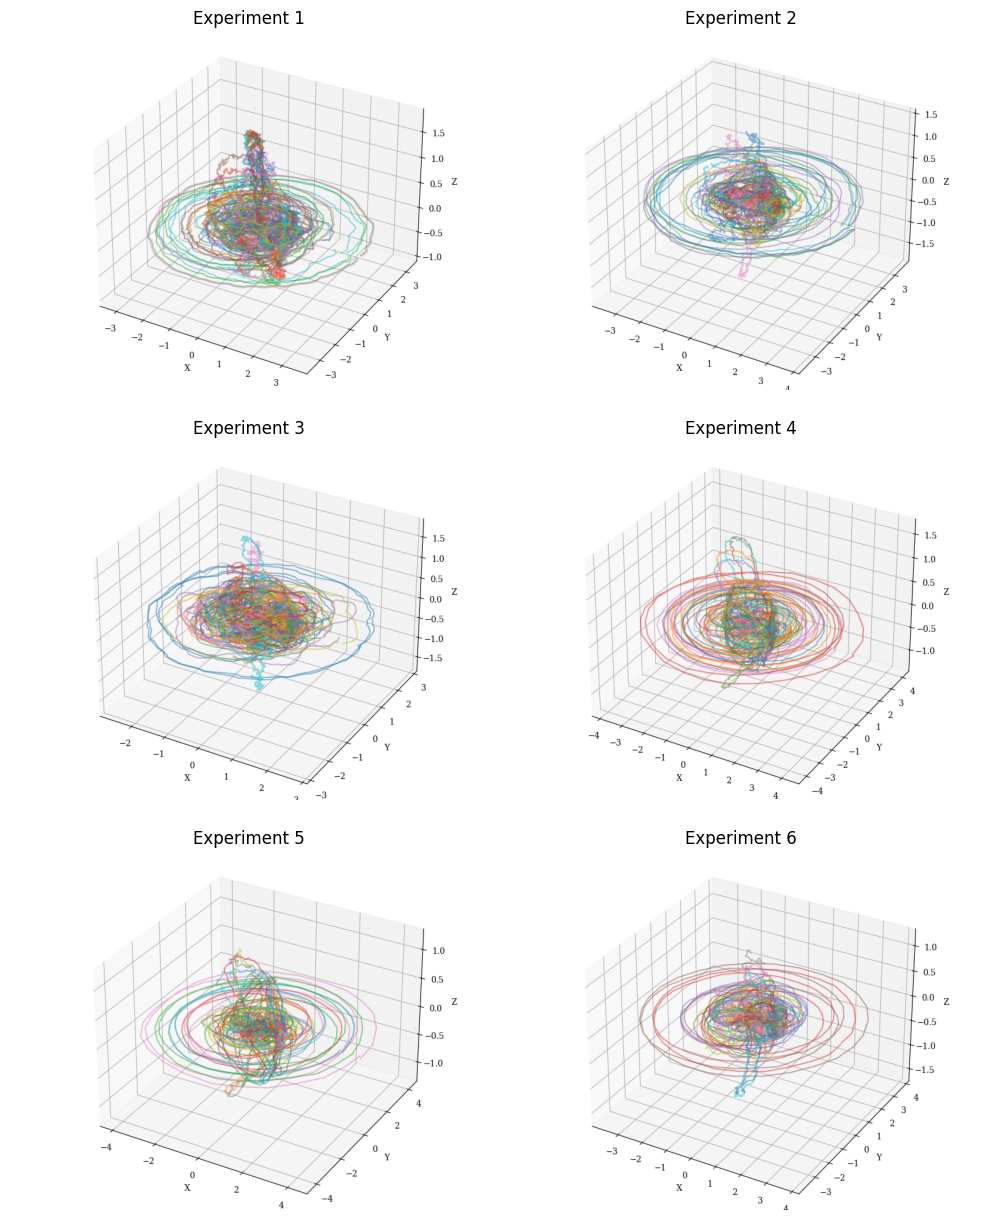

In [67]:
create_experiment_image_grid(experiments_folder, 'all_generated_data.png', font_size=100, crop_length=100)